# Regression Problem - Predicting the Apparent Temperature

In [405]:
import pandas as pd
import numpy as np

In [406]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

#for preprocessing part
from scipy import stats

In [407]:
# read the dataset 
weather =pd.read_csv("weatherHistory[1].csv")

In [408]:
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [409]:
weather 

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [410]:
#change misprint
weather=weather.rename(columns={'Loud Cover': 'Cloud Cover'})

# 1. getting to know the data

In [411]:
weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


### What are the features?
*Formatted Date - includes day, week , month, year

*Summary - sum up of the weather in words

*Precip Type - which type of raindrops there are

*Temperature (C) - temp in celcius

*Humidity - Humidity depends on the temperature and pressure .

*Wind Speed (km/h)	

*Wind Bearing (degrees)	- direction of the wind in degrees. For example , a wind blowing from the north has a wind direction referred to as 0° (360°); a wind blowing from the east has a wind direction referred to as 90°, etc.
<!-- The term "wind direction" is defined as the compass heading FROM which the wind is blowing -->

*Visibility (km) - visibility is a measure of the distance at which an object or light can be clearly discerned.	

*Cloud Cover	(loud cover- misprint)

*Pressure (millibars) - High pressure means the air is heavy . Under high pressure you can generally expect sunny skies and calm weather , whereas Low pressure systems lead to active weather like wind and rain, and also severe weather.

*Daily Summary - daily sum up of the weather in words


## What is the target variable?

Apparent Temperature : in simple words, Apparent Temperature is the temperature humans percieve, mostly outdoors, as a combination or the actual air temperature, humidity and wind. 

What else do we know?


*we are starting with 12 variables (including the dependent)



<!-- is The perceived temperature in degrees Fahrenheit derived from either a combination of temperature and wind (Wind Chill) or temperature and humidity (Heat Index) for the indicated hour. -
->




<!-- 1. Because the response variable is continuous, this is a regression problem.
2.There are 96453 observations (represented by the rows), and each observation is a weather report from a different date.
 -->

### the numeric variables histogramas:

here we can see the distribution of the numeric features, and approximately understand the most frequent values of each feature 

array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Wind Speed (km/h)'}>],
       [<AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>,
        <AxesSubplot:title={'center':'Pressure (millibars)'}>],
       [<AxesSubplot:title={'center':'Cloud Cover'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

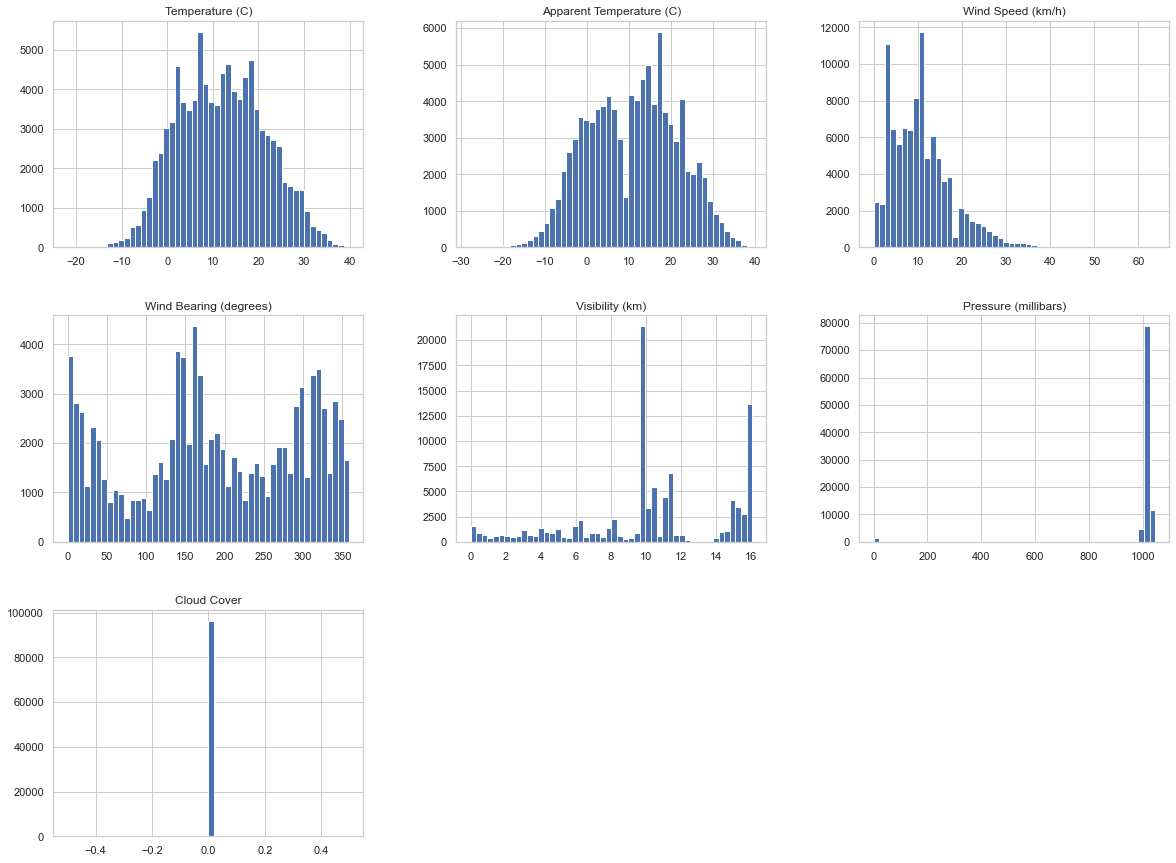

In [412]:
atttibutes_hist = weather[["Temperature (C)", "Apparent Temperature (C)", "Wind Speed (km/h)","Wind Bearing (degrees)",'Visibility (km)', "Pressure (millibars)",'Cloud Cover']].hist(bins=50, figsize=(20,15))
atttibutes_hist

as we can see, cloud cover has only values of 0 , so we should delete it 

In [413]:
del weather['Cloud Cover']

# 2. preprocessing of the data

In [414]:
weather=weather.dropna()

In [415]:
weather.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

as we can see, there is still nan values in the Precip Type column, but the percentage of it is low.

we will handle this by fill in the most common catagory of this feature (rain) instead of the nan values 

In [416]:
print(weather['Precip Type'].value_counts())

rain    85224
snow    10712
Name: Precip Type, dtype: int64


In [417]:
pd.options.mode.chained_assignment = None  # default='warn'
weather['Precip Type'] = weather['Precip Type'].fillna("rain")


#### Precip Type, Temperature, wind speed , Wind Bearing, pressure are features that supposed to be  linked very strongly with the Apparent Temperature (according to the information we read), they are crucial for the prediction of the Apparent Temperature. 

on the other hand, daily summary is not that beneficial,  since we have the column Precip Type and also Summary.



Since Daily Summary is not a numerical value and it has so many different values we can drop it.

In [418]:
weather

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,Partly cloudy starting in the morning.


In [419]:
weather = weather.drop(columns=['Daily Summary'])

In [420]:
import datetime
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'],utc=True)
weather['year'] = weather['Formatted Date'].dt.year
weather['month'] = weather['Formatted Date'].dt.month
weather['day'] = weather['Formatted Date'].dt.day
weather['weekday'] = weather['Formatted Date'].dt.weekday
del weather['Formatted Date']
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4


In [421]:
weather

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,2006,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,2006,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,2006,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,2006,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,2006,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,2016,9,9,4
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,2016,9,9,4
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,2016,9,9,4
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,2016,9,9,4


# getting rid of outliers and checking  for  anomalies:


<AxesSubplot:>

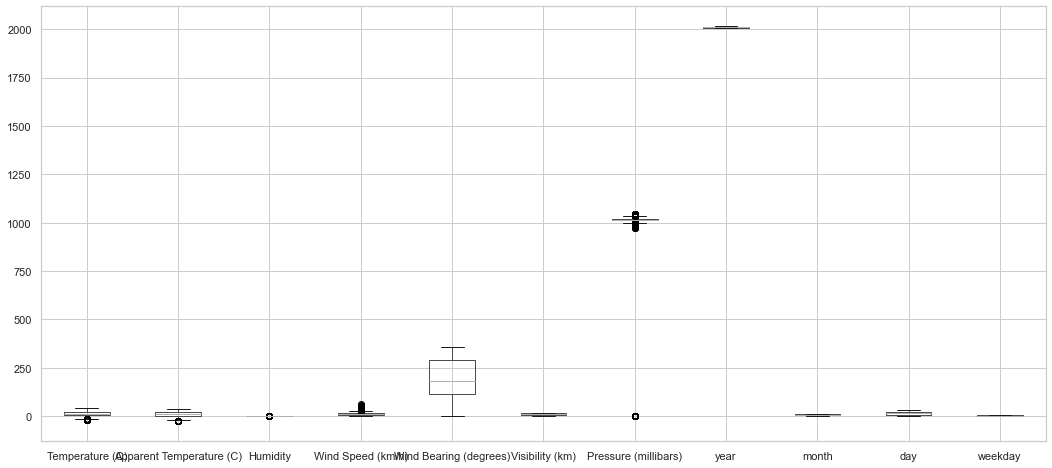

In [422]:
weather.boxplot(figsize=(18,8))

We can see that the data distribution of the Pressure feature is abnormal since Pressure has been 0. We can check how much data shows anomalies.



In [423]:
weather[weather['Pressure (millibars)'] == 0].shape[0]

1288

Those values may be the result of some human errors or system failures. So we cannot simply accept them and we cannot drop them as well since then we will miss other features data. So we can use IQR.

definition:

IQR or interquartile range is a measurement of variability based on dividing the dataset into different quantiles.

handeling the abnormal values of the pressure feature (getting rid of the outlier using the IQR method) and creating a plot to show the outcome 

Previous Shape With Outlier:  (95936, 13)
1011.89 1021.05
9.159999999999968
998.1500000000001 1034.79
Shape After Removing Outliers: (95936, 13)


<ipython-input-424-ad536d9daaf5>:2: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  plt.tight_layout(0.2)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without

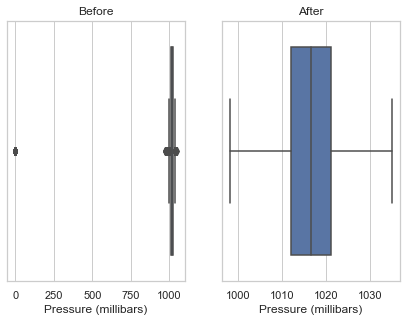

In [424]:
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)
print("Previous Shape With Outlier: ",weather.shape)
sns.boxplot(weather['Pressure (millibars)'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
Q1 = weather["Pressure (millibars)"].quantile(0.25)
Q3 = weather["Pressure (millibars)"].quantile(0.75)
print(Q1,Q3)
IQR = Q3-Q1
print(IQR)
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
print(lower_limit,upper_limit)
X2 = weather
X2['Pressure (millibars)'] = np.where(X2['Pressure (millibars)']>upper_limit,upper_limit,X2['Pressure (millibars)'])
X2['Pressure (millibars)'] = np.where(X2['Pressure (millibars)'] <lower_limit,lower_limit,X2['Pressure (millibars)'])
print("Shape After Removing Outliers:", X2.shape)
sns.boxplot(X2['Pressure (millibars)'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

In [425]:
weather[weather['Humidity'] == 0].shape[0]

22

Then we need to check outliers or anomalies in Humidity by plotting the box plot.

<AxesSubplot:>

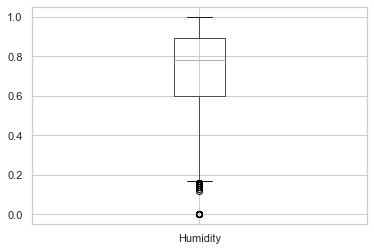

In [426]:
humidity_df = pd.DataFrame(X2["Humidity"])
humidity_df.boxplot()

We can see there is 0.0 humidity. So we should check how many data values are 0.0.

In [427]:
X2[X2['Humidity'] == 0].shape[0]


22

Given Earth’s climate and weather conditions, it’s impossible for humidity to be zero. And the number of data points with this anomaly is also very less so we can simply drop them.

In [428]:
X2 = X2.drop(X2[X2['Humidity'] == 0].index)


# dealing with skews in data
a skew is when the values of a feature tend to be one side, which makes the data unbalanced.  

In [429]:
#weather_copy=weather

In [430]:
#Finding out the skew for each attribute
skew=weather.skew()
print(skew)

Temperature (C)             0.091797
Apparent Temperature (C)   -0.059040
Humidity                   -0.715026
Wind Speed (km/h)           1.115995
Wind Bearing (degrees)     -0.154793
Visibility (km)            -0.492114
Pressure (millibars)        0.012571
year                        0.004751
month                      -0.004134
day                         0.010639
weekday                     0.000136
dtype: float64


We can see that Humidity is left-skewed and Wind Speed is right-skewed. Visibility also shows some left-skewness but after applying transformations, it did not show a normal distribution. So we did not apply transformations for Visibility.
For right-skewed data, we apply logarithmic transformations and for left-skewed data, we can apply exponential transformations.

Here we have used np.log1p since Wind Speed has 0.0 values, and np.log is only for positive numbers.

In [431]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import linear_model
from sklearn.preprocessing import FunctionTransformer

Histogram for Wind Speed after applying logarithm transformations


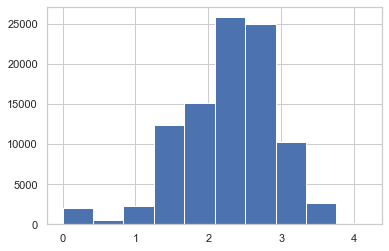

In [432]:
logarithm_transformer = FunctionTransformer(np.log1p)
data_new1 = logarithm_transformer.transform(weather['Wind Speed (km/h)'])
weather['Wind Speed (km/h)']=data_new1
weather['Wind Speed (km/h)'].hist()
print("Histogram for Wind Speed after applying logarithm transformations")

Histogram for Humidity after applying exponential transformations


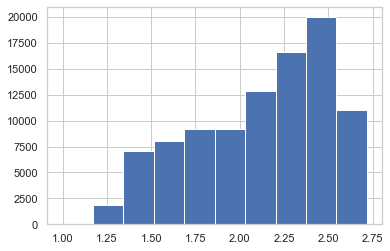

In [433]:
exp_transformer = FunctionTransformer(np.exp)
data_new2 = exp_transformer.transform(weather['Humidity'])
weather['Humidity']=data_new2
weather['Humidity'].hist()
print("Histogram for Humidity after applying exponential transformations")

we will remove the skew of the most unbalanced features

In [434]:
#Finding out the skew for each attribute
skew=weather.skew()
print(skew)

Temperature (C)             0.091797
Apparent Temperature (C)   -0.059040
Humidity                   -0.428884
Wind Speed (km/h)          -0.799401
Wind Bearing (degrees)     -0.154793
Visibility (km)            -0.492114
Pressure (millibars)        0.012571
year                        0.004751
month                      -0.004134
day                         0.010639
weekday                     0.000136
dtype: float64


array([[<AxesSubplot:title={'center':'Temperature (C)'}>,
        <AxesSubplot:title={'center':'Apparent Temperature (C)'}>,
        <AxesSubplot:title={'center':'Humidity'}>],
       [<AxesSubplot:title={'center':'Wind Speed (km/h)'}>,
        <AxesSubplot:title={'center':'Wind Bearing (degrees)'}>,
        <AxesSubplot:title={'center':'Visibility (km)'}>],
       [<AxesSubplot:title={'center':'Pressure (millibars)'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'weekday'}>, <AxesSubplot:>]],
      dtype=object)

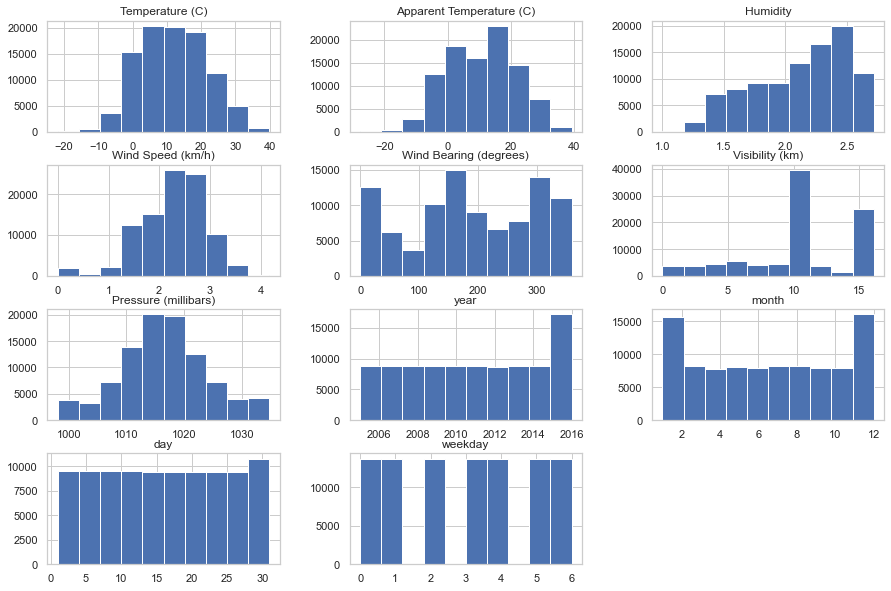

In [435]:
weather.hist(figsize=(15,10))

There is a Linear Relation between “Apparent Temperature ” and “Humidity” with a negative slope. As air temperature increases, air can hold more water molecules, and its relative humidity decreases. When temperatures drop, relative humidity increases.

In [441]:
#sns.pairplot(weather, x_vars=['middle of year'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

as we can see in the correlation below:

In [442]:
corr_matrix = weather.corr()
corr_matrix['Apparent Temperature (C)'].sort_values(ascending=False)

Apparent Temperature (C)    1.000000
Temperature (C)             0.992637
Visibility (km)             0.382589
month                       0.159874
Wind Bearing (degrees)      0.028951
year                        0.018931
day                         0.002022
weekday                     0.000479
Wind Speed (km/h)          -0.038266
Pressure (millibars)       -0.273892
Humidity                   -0.594489
Name: Apparent Temperature (C), dtype: float64

## 1.2 encoding catagorial data


which technique we are using?

for Summary - getDummies function , since it has more than 2 catagories. getDummies will take each catagory and create column for it in the data frame. the values will be 1 if it is the catagory and 0 if it's other catagoiries.

for precip type - we will use Series.cat.codes of pandas.


For linear models, One-hot Encoding is more suitable. If we apply Lable Encoding for such a situation, then the model will try to identify an order since the feature values are like 0,1,2,3, etc. But if it is a binary category we can use Label Encoding.

we need to encode Summary and Precip Type  to numeric columns

In [443]:
# i will save the original dataFrame for a later use, for example , for the data visualization.
weather_copy=weather.copy()

In [444]:
weather_copy

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday
0,Partly Cloudy,rain,9.472222,7.388889,2.435130,2.715999,251.0,15.8263,1015.13,2006,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,2.363161,2.725536,259.0,15.8263,1015.63,2006,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,2.435130,1.595014,204.0,14.9569,1015.94,2006,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,2.293319,2.714933,269.0,15.8263,1016.41,2006,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,2.293319,2.488616,259.0,15.8263,1016.51,2006,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,1.537258,2.484598,31.0,16.1000,1014.36,2016,9,9,4
96449,Partly Cloudy,rain,24.583333,24.583333,1.616074,2.406468,20.0,15.5526,1015.16,2016,9,9,4
96450,Partly Cloudy,rain,22.038889,22.038889,1.750673,2.300964,30.0,16.1000,1015.66,2016,9,9,4
96451,Partly Cloudy,rain,21.522222,21.522222,1.822119,2.444900,20.0,16.1000,1015.95,2016,9,9,4


In [445]:
weather['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [446]:
# or 
print(weather['Precip Type'].value_counts())

rain    85224
snow    10712
Name: Precip Type, dtype: int64


converting Precip Type to a category dtype:

In [447]:
weather['Precip Type']=weather['Precip Type'].astype('category')
weather['Precip Type']=weather['Precip Type'].cat.codes

 pd.get_dummies will make new feature columns according to each category and then we need to merge new feature columns and drop the Summary column as shown in the below code.

In [449]:
del weather['Summary']

<!-- If a categorical column has just two categories (it's called a binary category), then we can replace their values with 0 and 1. and because the 'Precip Type' column has only 2 catagoreis: -->

<!-- In contrast to the 'precip_type' column , the Summary column has a lot of catagories, so we will use labelEncoder in order to transform the non-numerical labels to numerical labels  
 -->

# 4. choosing a regression metric -

### We chose Mean abs error and R square as  metrics due to the explanations below and also beacause of the following dummy model results   (mae had a better result than rmse)
### later on we will choose one of them as a metric to our best model for the data, depending on how well it works with each model

##### Mean Squared Error (MSE)

The MSE is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset

when MSE is used as a loss function (regression metric), a lot of weight is given to larger errors because of the square
The units of the MSE are squared units.

A model that achieves an MSE better than the MSE for the naive model has skill.

In [450]:
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

##### Root Mean Squared Error

the units of the RMSE are the same as the original units of the target value that is being predicted, in contrast to MSE.
this is the advantage comapring to MSE.

In [451]:
# mean_squared_error(y_true, y_pred, squared=False)

#### Mean abs error

* like RMSE, the units of the error score match the units of the target value that is being predicted.

* Unlike the RMSE, the changes in MAE are linear and therefore intuitive - it is easier to interpert it

* knows how to deal with outliears better than the other 2.



*The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable (1 is the best).

#### R Square

R Squared & Adjusted R Squared are used for explaining how well the independent variables in the linear regression model explains the variability in the dependent variable.

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

in  simple words, R2 is the percentage of variation explaind by the relationship between two variables

In [452]:
del weather['weekday']
del weather['day']
del weather['year']


In [485]:
weather

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,0,9.472222,7.388889,2.435130,2.715999,251.0,15.8263,1015.13,3
1,0,9.355556,7.227778,2.363161,2.725536,259.0,15.8263,1015.63,3
2,0,9.377778,9.377778,2.435130,1.595014,204.0,14.9569,1015.94,4
3,0,8.288889,5.944444,2.293319,2.714933,269.0,15.8263,1016.41,4
4,0,8.755556,6.977778,2.293319,2.488616,259.0,15.8263,1016.51,4
...,...,...,...,...,...,...,...,...,...
96448,0,26.016667,26.016667,1.537258,2.484598,31.0,16.1000,1014.36,9
96449,0,24.583333,24.583333,1.616074,2.406468,20.0,15.5526,1015.16,9
96450,0,22.038889,22.038889,1.750673,2.300964,30.0,16.1000,1015.66,9
96451,0,21.522222,21.522222,1.822119,2.444900,20.0,16.1000,1015.95,9


# 5. Split the data to train and test

In [486]:
X = weather.drop(['Apparent Temperature (C)'],axis=1)
y = weather['Apparent Temperature (C)']

In [487]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [488]:
X_train

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
49839,0,20.811111,1.786038,2.930778,319.0,11.2700,1011.34,5
23605,0,26.966667,1.476981,3.070826,223.0,10.3523,1010.61,5
26053,0,16.022222,1.803988,3.147006,49.0,11.2700,1023.83,9
3299,1,-7.172222,2.203396,1.819391,211.0,4.9910,1034.79,1
90469,0,6.144444,1.934792,2.364987,357.0,10.5777,1026.16,2
...,...,...,...,...,...,...,...,...
6265,0,14.511111,2.316367,1.811529,137.0,14.5866,1018.20,5
54964,1,-11.877778,2.339647,2.462891,202.0,3.5742,1012.02,2
76963,0,6.755556,2.459603,2.460144,150.0,14.8120,1012.90,11
860,0,19.161111,2.270500,0.572560,121.0,9.9820,1012.44,8


In [489]:
X_test.shape

(19188, 8)

In [490]:
y_train

49839    20.811111
23605    26.777778
26053    16.022222
3299     -9.805556
90469     4.116667
           ...    
6265     14.511111
54964   -17.744444
76963     4.633333
860      19.161111
15795     2.500000
Name: Apparent Temperature (C), Length: 76748, dtype: float64

# 6. Scaling


את הנירמול לא נעשה על משתנים קטגרויאליים ושמיים שעשינו עליהם כבר encoding  
,כי אין אפשרות להשוות
ניצור גאטא פריים חדש מנורמל
את הויזואליצזיה של הדאטא נעשה על הדאטא פריים המקורי, הלא מנורמל, כדי שנראה את המידע בצורה ברורה ונראה מה המספרים מייצגים

we will do the scaling only on numerical features i.e not on the categorial . 
 i.e , the features we didn't encoded

In [491]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [492]:
# X_train.isnull().any()

In [493]:
# X_train2 = X_train.copy()
# X_test2 = X_test.copy()

In [494]:
X_train_standardized = X_train.copy()
X_test_standardized = X_test.copy()


In [495]:
scaler_standard = StandardScaler()
scaler_MinMax = MinMaxScaler()

In [496]:
numerical_features = ["Temperature (C)","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]

In [497]:
# Standardization:
scaler_standard.fit(X_train[numerical_features])
X_train_standardized[numerical_features] = scaler_standard.transform(X_train_standardized[numerical_features])

# the scaling is with the the same fitted scaler (by the train data)
#only transform on the test data
X_test_standardized[numerical_features] = scaler_standard.transform(X_test_standardized[numerical_features])


In [498]:
print('note: the mean is 0 and std is 1')
X_train_standardized.describe()[numerical_features].iloc[[1, 2]]

note: the mean is 0 and std is 1


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
mean,4.621541e-17,1.621199e-15,1.531222e-16,8.322912e-17,-1.141163e-15,-2.443617e-14
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00


In [499]:
X_train_standardized

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
49839,0,0.925481,-0.871737,0.982444,1.223295,0.220327,-0.674807,5
23605,0,1.568290,-1.669177,1.193141,0.329556,0.000663,-0.769524,5
26053,0,0.425389,-0.825422,1.307751,-1.290344,0.220327,0.945768,9
3299,1,-1.996750,0.205142,-0.689594,0.217839,-1.282638,2.367826,1
90469,0,-0.606123,-0.487918,0.131234,1.577066,0.054615,1.248085,2
...,...,...,...,...,...,...,...,...
6265,0,0.267587,0.496632,-0.701421,-0.471084,1.014200,0.215277,5
54964,1,-2.488140,0.556700,0.278527,0.134051,-1.621768,-0.586577,2
76963,0,-0.542306,0.866215,0.274394,-0.350057,1.068153,-0.472397,11
860,0,0.753175,0.378285,-2.565402,-0.620041,-0.087974,-0.532082,8


In [500]:
X_train2.isnull().any()

NameError: name 'X_train2' is not defined

In [501]:
# y_train

# 7. data visualization

 using the preproccessed dataFrame, before scaling, 
in order to get meaningful and clear picture of the data

 using the preproccessed dataFrame, before scaling, 
in order to get meaningful and clear picture of the data

In [502]:
train=X_train.copy()

In [503]:
train_numeric=train[numerical_features]

In [504]:
train_numeric['Apparent Temperature (C)']=y_train

# correlations

### correlation matrix

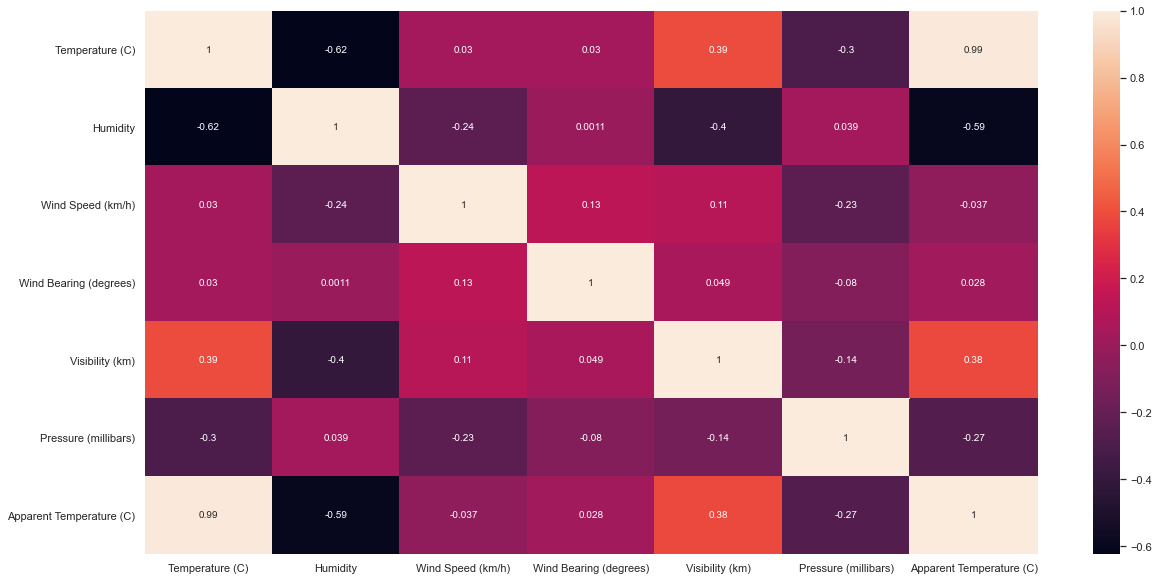

In [473]:
plt.figure(figsize=(20,10))
sns.heatmap(train_numeric.corr(),annot=True);

as we can see from the heatmap above, the correlation between the Apparent Temperature to the pressure is very low

Numerical input variables may have a highly skewed or non-standard distribution.

This could be caused by outliers in the data, multi-modal distributions, highly exponential distributions, and more.

In [338]:
#doing fit only on the train, transform on both
X2=X_train.copy()
Y2=X_test.copy()

#### Discretization Transforms

Many machine learning algorithms prefer or perform better when numerical with non-standard probability distributions are made discrete.

Discretization transforms are a technique for transforming numerical input or output variables to have discrete ordinal labels.

changing the structure and distribution of numeric variables to improve the performance of predictive models.

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

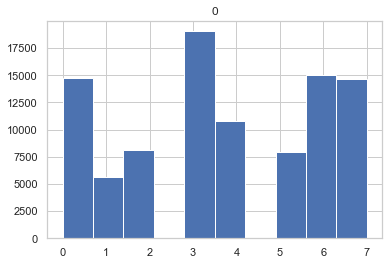

In [474]:

data1 = pd.DataFrame(X2, columns=['Wind Bearing (degrees)'])
data1 = data1.dropna()
data2 = pd.DataFrame(Y2, columns=['Wind Bearing (degrees)'])
data2 = data2.dropna()
discretizer = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='uniform')
discretizer.fit(data1)
_discretize1 = discretizer.transform(data1)
_discretize2 = discretizer.transform(data2)
X_dis = pd.DataFrame(_discretize1)
Y_dis = pd.DataFrame(_discretize2)
X_dis.hist()

checking out which features have the highest correlation with the target variable - Apparent Temperature


In [475]:
corr_matrix = train_numeric.corr()
corralations = corr_matrix['Apparent Temperature (C)'].sort_values(ascending = False) 
high_corr = (corralations > 0.2)|(corralations < -0.2)
pd.DataFrame(corralations[high_corr])
corralations[high_corr].index

Index(['Apparent Temperature (C)', 'Temperature (C)', 'Visibility (km)',
       'Pressure (millibars)', 'Humidity'],
      dtype='object')

heatmap of the high correlations with  Apparent Temperature:


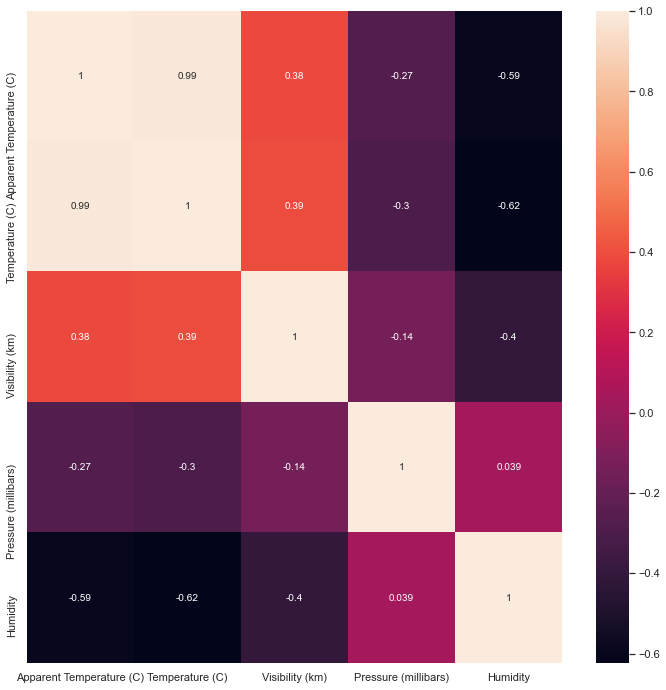

In [476]:
# cmap = sns.diverging_palette(30, 230, 90, 20, as_cmap=True)
print("heatmap of the high correlations with  Apparent Temperature:")
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(train_numeric[corralations[high_corr].index].corr(),annot=True)
sns.set(font_scale=1)

In [477]:
train_numeric

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Apparent Temperature (C)
49839,20.811111,1.786038,2.930778,319.0,11.2700,1011.34,20.811111
23605,26.966667,1.476981,3.070826,223.0,10.3523,1010.61,26.777778
26053,16.022222,1.803988,3.147006,49.0,11.2700,1023.83,16.022222
3299,-7.172222,2.203396,1.819391,211.0,4.9910,1034.79,-9.805556
90469,6.144444,1.934792,2.364987,357.0,10.5777,1026.16,4.116667
...,...,...,...,...,...,...,...
6265,14.511111,2.316367,1.811529,137.0,14.5866,1018.20,14.511111
54964,-11.877778,2.339647,2.462891,202.0,3.5742,1012.02,-17.744444
76963,6.755556,2.459603,2.460144,150.0,14.8120,1012.90,4.633333
860,19.161111,2.270500,0.572560,121.0,9.9820,1012.44,19.161111


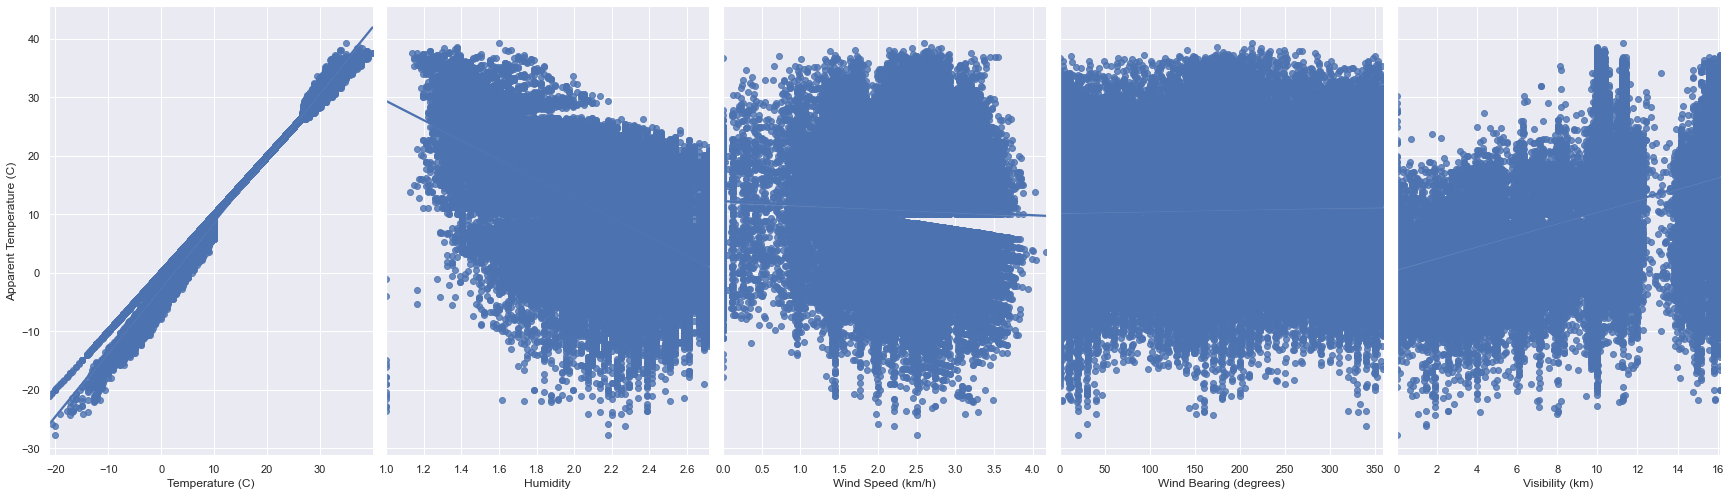

In [478]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(train_numeric, x_vars=['Temperature (C)','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)'], y_vars='Apparent Temperature (C)', height=7, aspect=0.7, kind='reg')

In [479]:
# sns.scatterplot(data=train_numeric, x='Temperature (C)', y= 'Wind Speed (km/h)')

 we can see that temperature, humidity and visibility are highly correlated to the apparent temperature in comparison to other features

### replacing a feature with a better one - 
we tried to create 2 more features, but they didn't improved our dataset in order to predict the apparent temperature.
the features:
1. middle of year -  checks if the month is in the middle of the year , or the beggining or the end - we have set the beggining of the middle to be the 5th month, and the end of the middle to be the 9th month ( if its in the middle of the year - true, if it isn't - false.
2. weather['wind-visibility-ratio']=weather['Wind Speed (km/h)']/weather['Visibility (km)'] - it gave a higher correlation than wind speed, but it didn't improved anything since we had to get rid of one of the features that we assumed is very beneficial to the prediction


# categorial features correlation:

In [345]:
weather_copy

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),year,month,day,weekday
0,Partly Cloudy,rain,9.472222,7.388889,2.435130,2.715999,251.0,15.8263,1015.13,2006,3,31,4
1,Partly Cloudy,rain,9.355556,7.227778,2.363161,2.725536,259.0,15.8263,1015.63,2006,3,31,4
2,Mostly Cloudy,rain,9.377778,9.377778,2.435130,1.595014,204.0,14.9569,1015.94,2006,4,1,5
3,Partly Cloudy,rain,8.288889,5.944444,2.293319,2.714933,269.0,15.8263,1016.41,2006,4,1,5
4,Mostly Cloudy,rain,8.755556,6.977778,2.293319,2.488616,259.0,15.8263,1016.51,2006,4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,1.537258,2.484598,31.0,16.1000,1014.36,2016,9,9,4
96449,Partly Cloudy,rain,24.583333,24.583333,1.616074,2.406468,20.0,15.5526,1015.16,2016,9,9,4
96450,Partly Cloudy,rain,22.038889,22.038889,1.750673,2.300964,30.0,16.1000,1015.66,2016,9,9,4
96451,Partly Cloudy,rain,21.522222,21.522222,1.822119,2.444900,20.0,16.1000,1015.95,2016,9,9,4


we took samples of catagories from the "Summary" feature, in order to see the relations between this feature and the "Precip Type" feature with the target

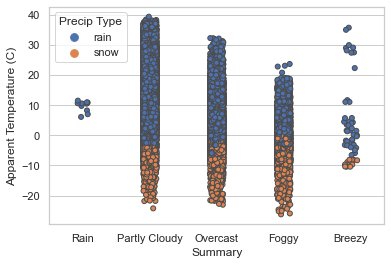

In [346]:
sns.set_theme(style="whitegrid")
ax = sns.stripplot(x="Summary", y='Apparent Temperature (C)',hue='Precip Type',order=['Rain','Partly Cloudy','Overcast','Foggy','Breezy'], data=weather_copy , linewidth= 1, size=5)

*here we can see what we think intuitively - the apparent temperature, i.e., the temperature we as humans feel is higher when there's snow comparing to when it rains. 

*We assumed that if there's an overcast, the apparent temperatue is lower, but here we can see that it's not neccesarily the case, so we can't say there's a strong correlation between the overcast catagory in Summary and the apparent temperatue.

*another thing we see here is that when it rains, the apparent temperature can vary from 0 to 40 approximately, which means that it's hard to predict what temperature  we would feel when the precip type is rain. 

now let's see the correlation between the features after the few changes we did:

In [505]:
corr_matrix = weather.corr()
corr_matrix['Apparent Temperature (C)'].sort_values(ascending=False)

Apparent Temperature (C)    1.000000
Temperature (C)             0.992637
Visibility (km)             0.382589
month                       0.159874
Wind Bearing (degrees)      0.028951
Wind Speed (km/h)          -0.038266
Pressure (millibars)       -0.273892
Precip Type                -0.566058
Humidity                   -0.594489
Name: Apparent Temperature (C), dtype: float64

In [506]:
weather

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month
0,0,9.472222,7.388889,2.435130,2.715999,251.0,15.8263,1015.13,3
1,0,9.355556,7.227778,2.363161,2.725536,259.0,15.8263,1015.63,3
2,0,9.377778,9.377778,2.435130,1.595014,204.0,14.9569,1015.94,4
3,0,8.288889,5.944444,2.293319,2.714933,269.0,15.8263,1016.41,4
4,0,8.755556,6.977778,2.293319,2.488616,259.0,15.8263,1016.51,4
...,...,...,...,...,...,...,...,...,...
96448,0,26.016667,26.016667,1.537258,2.484598,31.0,16.1000,1014.36,9
96449,0,24.583333,24.583333,1.616074,2.406468,20.0,15.5526,1015.16,9
96450,0,22.038889,22.038889,1.750673,2.300964,30.0,16.1000,1015.66,9
96451,0,21.522222,21.522222,1.822119,2.444900,20.0,16.1000,1015.95,9


## dummy model

In [507]:
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error as MAE

from matplotlib import pyplot
from sklearn.metrics import mean_squared_error



In [508]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
R2_score = dummy_regr.score(X_test, y_test)
y_predict = dummy_regr.predict(X_test)
mae = MAE(y_test, y_predict)
rmse= mean_squared_error(y_test, y_predict, squared=False)


print ('The dummy model have a root mean squared error of '+ str(rmse) )

# errorsRMSE

The dummy model have a root mean squared error of 10.71242142413828


In [509]:
print('The dummy model have a R2 score of ' + str(R2_score)[:6] + " as expected (around 0), and mean absolute error of " + str(mae)[:4])

The dummy model have a R2 score of -2.208 as expected (around 0), and mean absolute error of 9.01


# The dummy model have a R2 score of  -2.208 as expected (around 0), and mean absolute error of 9.01

# comparing different Regression Models

*cross validation allows us to compare different machine learning methods and get a sense of how well they will work in practice. the advantage here, is that it uses different blocks of data for train and test, and by that, "prepare" the model in the best way to predict outcome for new data  

 # Linear Regression

In [510]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [511]:
LR = LinearRegression()

In [512]:
y_train

49839    20.811111
23605    26.777778
26053    16.022222
3299     -9.805556
90469     4.116667
           ...    
6265     14.511111
54964   -17.744444
76963     4.633333
860      19.161111
15795     2.500000
Name: Apparent Temperature (C), Length: 76748, dtype: float64

In [513]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

R2_scores_standardized = cross_val_score(LR, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)



In [ ]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)
fig, axes = plt.subplots(1,2)
((ax1, ax2)) = axes

y_predicted = cross_val_predict(LR, X_train_standardized, y_train, cv=kf)
ax1.scatter(y_train, y_predicted, alpha=0.3, color='orange')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title('standardized:')



 plt.show()





In [515]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean()) + " with std of  " + str(R2_scores_standardized.std()) + " and MAE of " + str(mae_standarsized))

the scores of cross validation are:
[0.99033005 0.99013363 0.99004164 0.99018055 0.99022779 0.99016485
 0.9901808  0.99010989 0.99015274 0.99018204]

mean R2 is: 0.9901703979811993 with std of  7.14599386666645e-05 and MAE of 0.840130546465623


In [518]:
R2_scores_standardized

array([0.99033005, 0.99013363, 0.99004164, 0.99018055, 0.99022779,
       0.99016485, 0.9901808 , 0.99010989, 0.99015274, 0.99018204])

In [532]:
best_score=min(R2_scores_standardized)

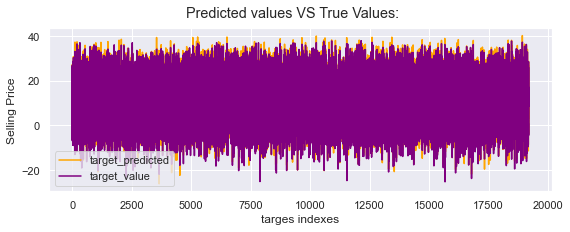

,R2_score,MAE score
test LR model,0.99019,0.839634


In [534]:
LR.fit(X_train_standardized, y_train)
R2_score = LR.score(X_test_standardized, y_test)
y_predict = LR.predict(X_test_standardized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test LR model'], data={'R2_score': R2_score, 'MAE score': mae_score})

# Random Forest Regressor

In [520]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [521]:
#RFR = RandomForestRegressor()

In [522]:
regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train_standardized, y_train)

RandomForestRegressor(max_depth=2, random_state=42)

In [523]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [524]:
R2_scores_standardized = cross_val_score(regr, X_train_standardized, y_train, cv=kf)
y_predict_standardized = cross_val_predict(regr, X_train_standardized, y_train, cv=kf)
mae_standarsized = MAE(y_train, y_predict_standardized)

In [527]:
print("the scores of cross validation are:")
print(R2_scores_standardized)
print()
print("mean R2 is: " + str(R2_scores_standardized.mean())[:5] + " with std of  " + str(R2_scores_standardized.std())[:5] + " and MAE of " + str(mae_standarsized)[:6])

the scores of cross validation are:
[0.90955918 0.90891527 0.90512238 0.90632496 0.90769555 0.90906687
 0.90480143 0.90576264 0.90657192 0.90752096]

mean R2 is: 0.907 with std of  0.001 and MAE of 2.6521


the results are not so good with the MAE metric. we will try to decrese the MAE and increase the R2 with random search - choosing the best hyperparameter for the random forest model.

 for regression trees its variance. So when training a tree we can compute how much each feature contributes to decreasing the weighted impurity. feature_importances_ in Scikit-Learn is based on that logic, but in the case of Random Forest, we are talking about averaging the decrease in impurity over trees.

# random search random forest

# hyperparameter tuning 
I will try to increase the R2 score and the MAE of the Random Forest Regressor model by choosing the best hyperparams.

## random search 

With small data sets and lots of resources, Grid Search will produce accurate results. However, with large data sets, the high dimensions will greatly slow down computation time and be very costly. Therefore, we chose to use random search for 

random search requires two arguments. The first is the model that you are optimizing. This is an instance of the model with values of hyperparameters set that you want to optimize. 
The second is the search space:
This is defined as a dictionary where the names are the hyperparameter arguments to the model and the values are discrete values or a distribution of values to sample in the case of a random search.

In [528]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from rfpimp import permutation_importances
from sklearn.metrics import r2_score


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [529]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [537]:
# Number of trees in random forest
# to get better resluts and hyperparameters , i increased the number of estimators.
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
#If “auto”, then max_features=n_features.
max_features = ['auto']

# Maximum number of levels in tree
# to get better resluts and hyperparameters , i made the depth wider.
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [538]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# rf = regr
# RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use 4 cores - according to my cpu
# Setting refit='r2', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated r2 score.

rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 10, cv = kf,  scoring=['neg_mean_absolute_error','r2'] , refit='r2', verbose=2, random_state=42, n_jobs = 1)

# Fit the random search model
rf_random.fit(X_train_standardized, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   1.8s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   1.9s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   2.5s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   2.3s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True, total=   2.4s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=10, min_s

[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  14.1s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  14.0s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  16.3s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False, total=  15.5s
[CV] n_estimators=60, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=60, min_samples_s

[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True, total=   1.9s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True, total=   2.5s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True, total=   3.3s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True, total=   3.6s
[CV] n_estimators=10, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=10, min_samples_split=2, 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 23.8min finished


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(max_depth=2,
                                                   random_state=42),
                   n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, refit='r2',
                   scoring=['neg_mean_absolute_error', 'r2'], verbo


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
                 
                 estimator=RandomForestRegressor(max_depth=2,
                                                   random_state=42),
                
                n_jobs=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, refit='r2',
                   scoring=['neg_mean_absolute_error', 'r2'], verbose=2)

In [539]:
# rf.fit(X_train_standardized, y_train)
rf = rf_random.best_estimator_
rf.fit(X_train_standardized, y_train)

RandomForestRegressor(max_depth=60, min_samples_split=5, n_estimators=70,
                      random_state=42)

In [ ]:
# rf.feature_importances_
# feature_imp = pd.Series(rf.feature_importances_,index=X_train_standardized.columns).sort_values(ascending=False)
# print("feature importances list:")
# feature_imp

In [540]:
# Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 
rf_random.best_estimator_

RandomForestRegressor(max_depth=60, min_samples_split=5, n_estimators=70,
                      random_state=42)

In [541]:
#Mean cross-validated score of the best_estimator.\
# after checking the score of the mae, we saw that the the r2 score was better 
rf_random.best_score_



0.9999661416043999

In [542]:
# Parameter setting that gave the best results on the hold out data.
rf_random.best_params_

{'n_estimators': 70,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

# Testing best Random forest Regressor model:

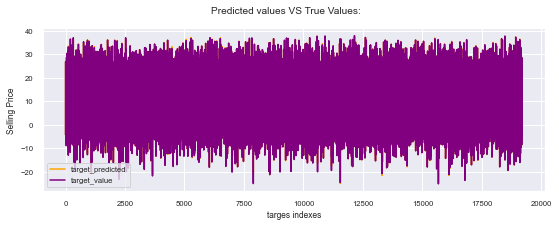

,R2_score,MAE score
test RFR model,0.99995,0.015715


In [549]:
rf = rf_random.best_estimator_
rf.fit(X_train_standardized, y_train)

R2_score = rf.score(X_test_standardized, y_test)
y_predict = rf.predict(X_test_standardized)
mae_score = MAE(y_test, y_predict)

indexes = list(range(1, len(y_predict)+1))
fig, axs = plt.subplots(1, 1, figsize=(9, 3), sharey=True)
axs.plot(indexes, y_predict, label='target_predicted', color='orange')
axs.plot(indexes, y_test, label='target_value', color='purple')
axs.legend()
axs.set_xlabel('targes indexes')
axs.set_ylabel('Selling Price')
fig.suptitle('Predicted values VS True Values:')
plt.show()

pd.DataFrame(index=['test RFR model'], data={'R2_score': R2_score, 'MAE score': mae_score}) 

see the loss of each metric in a plot

what can we do better?

*use SMOGN or SMOTER to balance the data

*use other feature selection methods